In [1]:
import sys
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

# Изменим стандартный размер графиков matplotlib
plt.rcParams["figure.figsize"] = [6, 4]

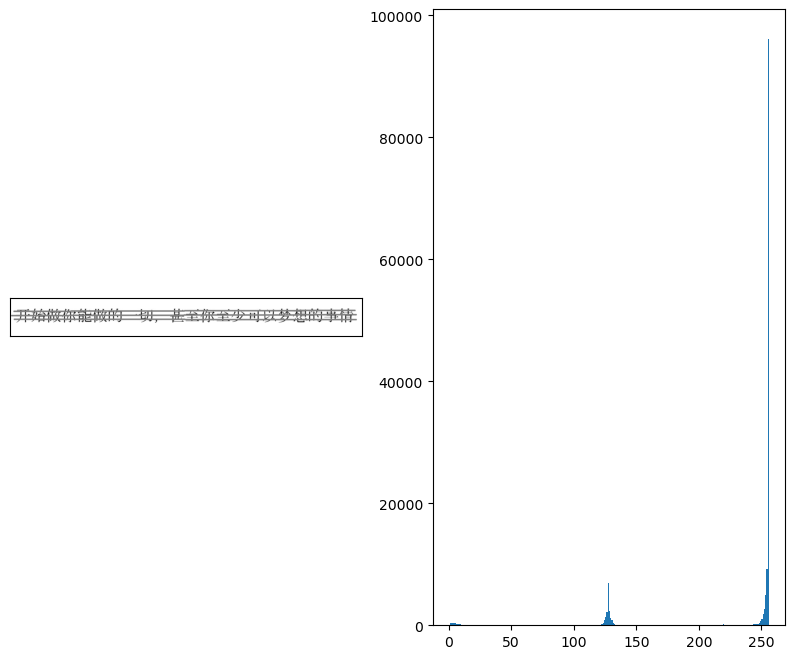

In [2]:
path = 'E:\\ant4Lab.jpg'
image = cv.imread(path)
# plt.imshow(image)

rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image = gray_image

channels = [0]
histSize = [256]
range = [0, 256]

gs = plt.GridSpec(1, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.hist(gray_image.reshape(-1), 256, range)
plt.show()

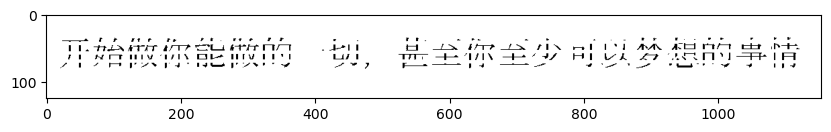

In [3]:
#порог
threshold = 113

ret, thresh1 = cv.threshold(image, threshold, 255, cv.THRESH_BINARY)
plt.figure(figsize=(10, 70))
plt.imshow(thresh1, 'gray', vmin=0, vmax=255)

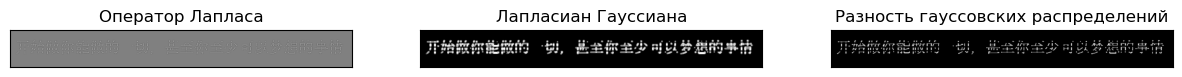

In [4]:
outImageDepth = cv.CV_16S  # глубина результирующего изображения. 
#Т.к. входное изображение 8-битное, 
#чтобы избежать переполнения сделаем выходное изображение 16-битное.

gaussian33 = cv.GaussianBlur(thresh1, (3, 3), 0)
gaussian55 = cv.GaussianBlur(thresh1, (5, 5), 0)

# применяем оператор Лапласа к тестовому изображению
laplace = cv.Laplacian(thresh1, outImageDepth, ksize=3)
# laplace = cv.convertScaleAbs(laplace)
# вычисляем разность гауссовских разпределений
dog = gaussian33 - gaussian55
# dog = cv.convertScaleAbs(dog)
# вычисляем Лапласиан Гауссиана
log = cv.Laplacian(gaussian33, outImageDepth, ksize=3)
log = cv.convertScaleAbs(log)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(1, 3)

titles = ['Оператор Лапласа', 'Лапласиан Гауссиана', 'Разность гауссовских распределений']
outImages = [laplace, log, dog]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

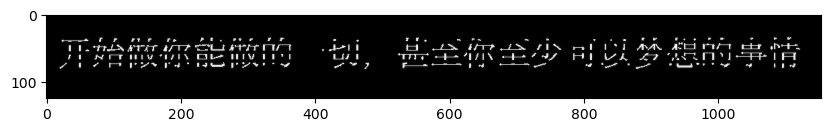

In [5]:
plt.figure(figsize=(10, 70))
plt.imshow(dog, 'gray', vmin=0, vmax=255)

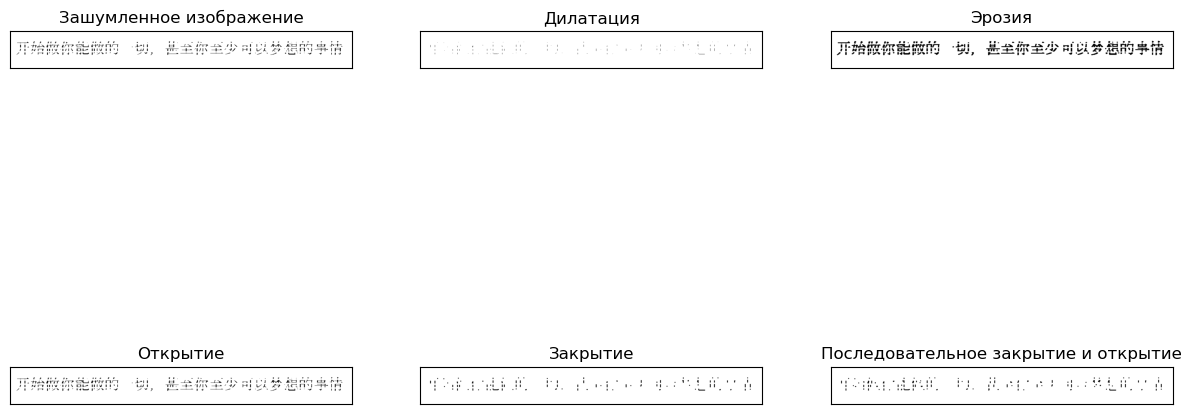

In [6]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(thresh1, kernel, iterations=1)
erosion = cv.erode(thresh1, kernel, iterations=1)
opening = cv.morphologyEx(thresh1, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(thresh1, cv.MORPH_CLOSE, kernel)
closeAndOpen = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(2, 3)

titles = ['Зашумленное изображение', 'Дилатация', 'Эрозия', 'Открытие', 'Закрытие',
          'Последовательное закрытие и открытие']
outImages = [thresh1, dilation, erosion, opening, closing, closeAndOpen]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

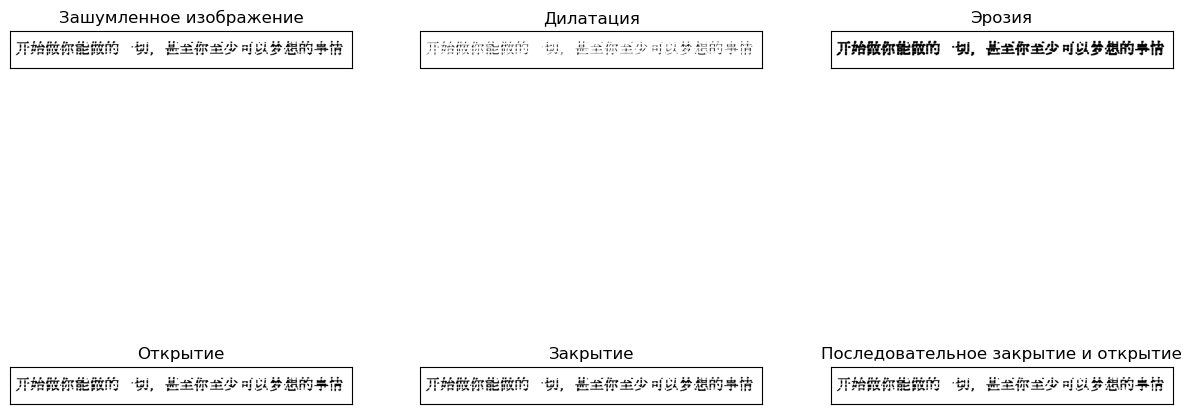

In [7]:
image = erosion

kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(image, kernel, iterations=1)
erosion = cv.erode(image, kernel, iterations=1)
opening = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)
closeAndOpen = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)

# вывод
plt.figure(figsize=(15, 8))
gs = plt.GridSpec(2, 3)

titles = ['Зашумленное изображение', 'Дилатация', 'Эрозия', 'Открытие', 'Закрытие',
          'Последовательное закрытие и открытие']
outImages = [image, dilation, erosion, opening, closing, closeAndOpen]

for i in np.arange(len(outImages)):
    plt.subplot(gs[i])
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(outImages[i], cmap='gray')

plt.show()

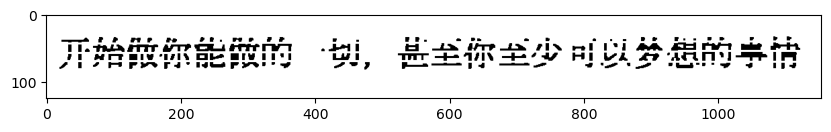

In [8]:
plt.figure(figsize=(10, 70))
plt.imshow(opening, 'gray', vmin=0, vmax=255)
#plt.imshow(erosion, 'gray', vmin=0, vmax=255)

In [ ]:
cv.imwrite("Eroz.jpg", erosion)